## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## load dataset

In [2]:
df = pd.read_csv('diabetes.csv')

## Exploratory data analysis

## a)Understanding data

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## b)Data cleaning

In [9]:
df = df.drop_duplicates()

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


In [12]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0,df['Insulin'].median())

## Data Visualization

C:\Python_code\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


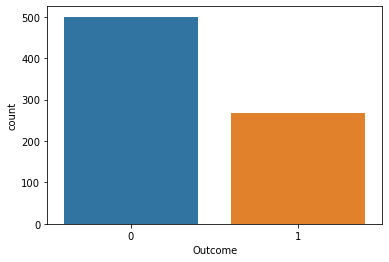

In [13]:
sns.countplot('Outcome',data=df)
# Include legend in the graph

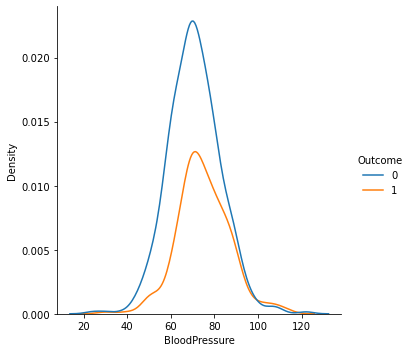

In [14]:
sns.displot(data=df, x="BloodPressure", hue="Outcome", kind = 'kde')

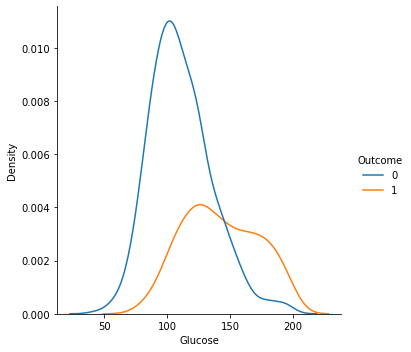

In [15]:
sns.displot(data=df, x="Glucose", hue="Outcome", kind = 'kde')

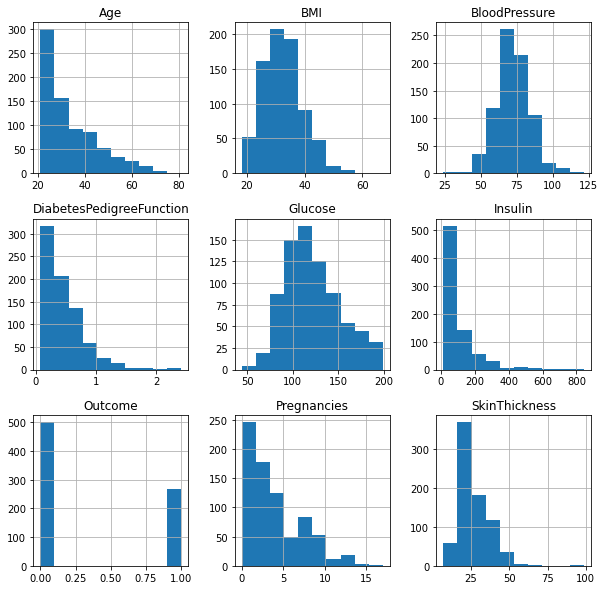

In [16]:
df.hist(bins=10,figsize=(10,10))
plt.show()

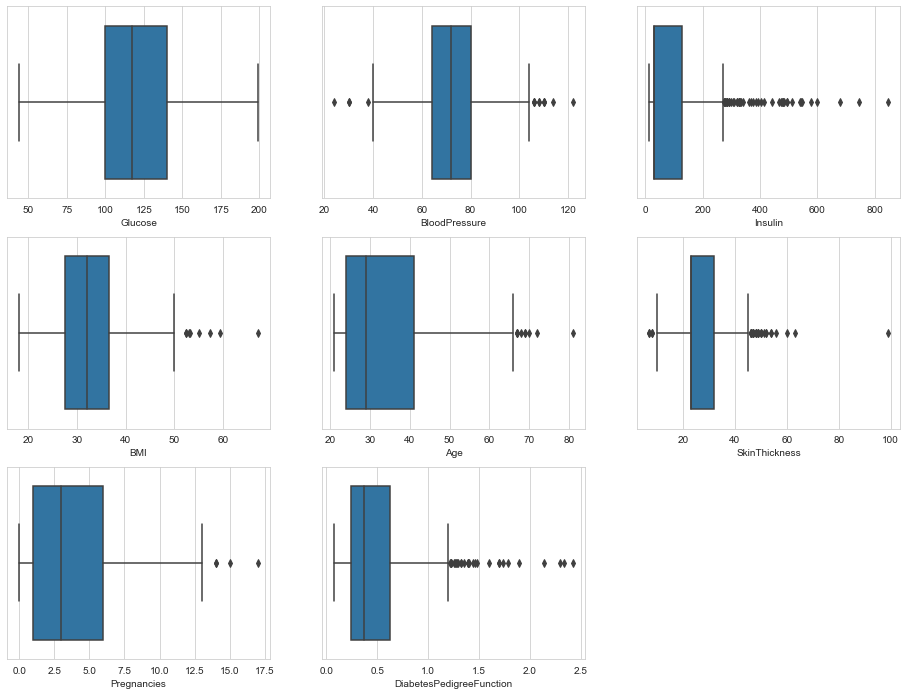

In [17]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

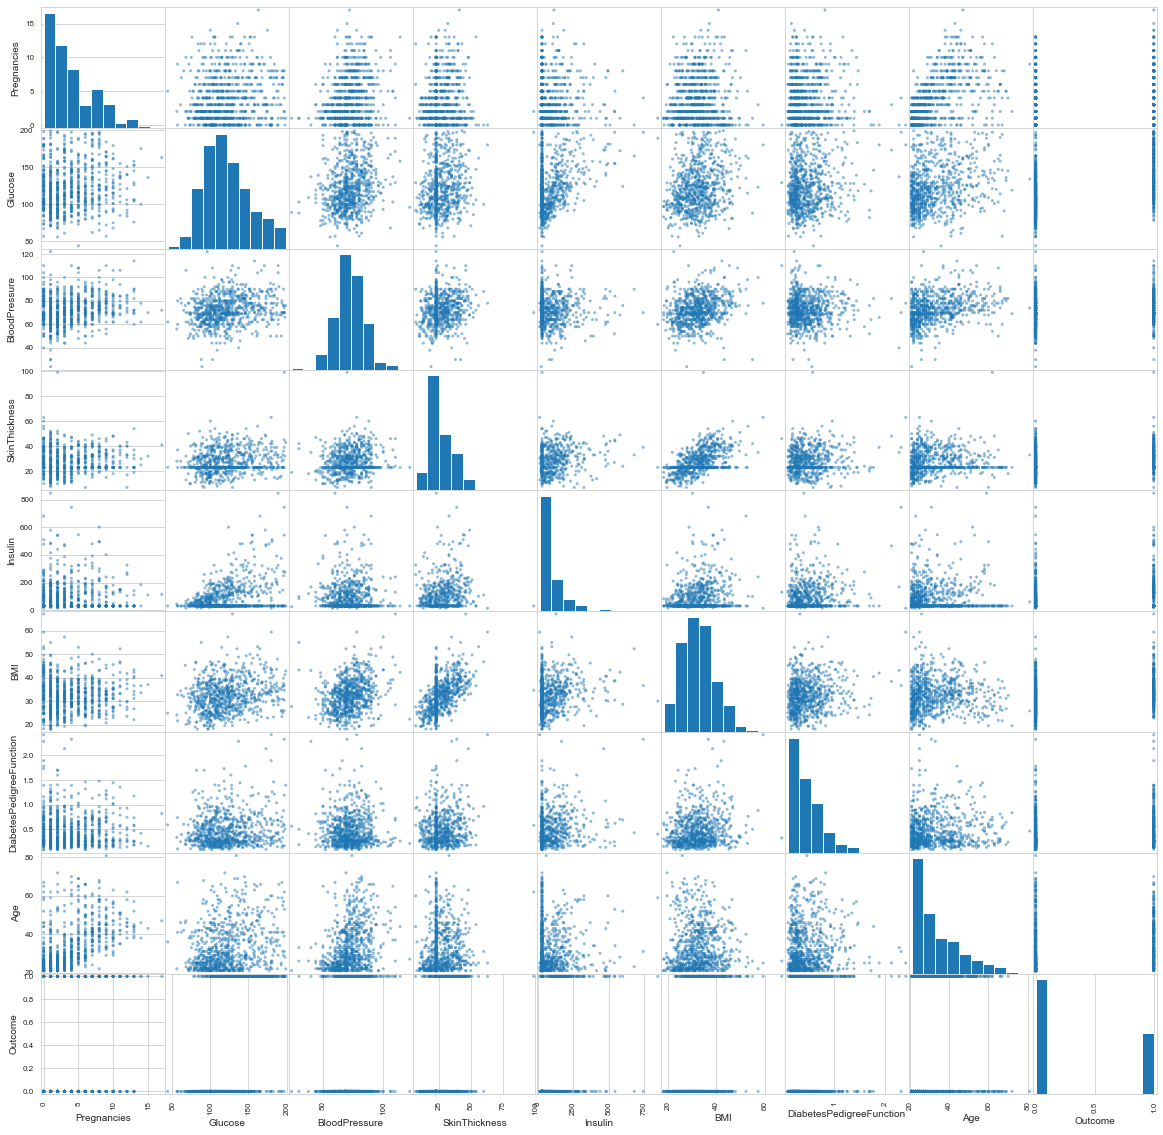

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20));

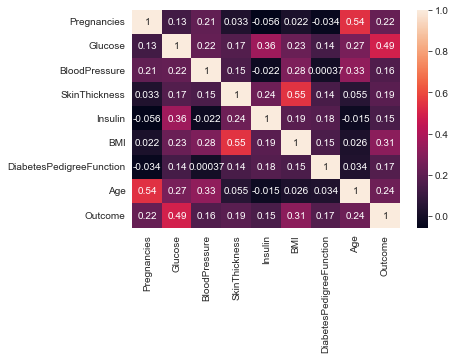

In [19]:
corrmat = df.corr()
sns.heatmap(corrmat,annot=True)

In [20]:
df_selected = df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

In [21]:
df_selected

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,6,148.0,35,33.6,50,1
1,1,85.0,29,26.6,31,0
2,8,183.0,23,23.3,32,1
3,1,89.0,23,28.1,21,0
4,0,137.0,35,43.1,33,1
...,...,...,...,...,...,...
763,10,101.0,48,32.9,63,0
764,2,122.0,27,36.8,27,0
765,5,121.0,23,26.2,30,0
766,1,126.0,23,30.1,47,1


## Handeling Outliers

In [26]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()

C:\Python_code\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


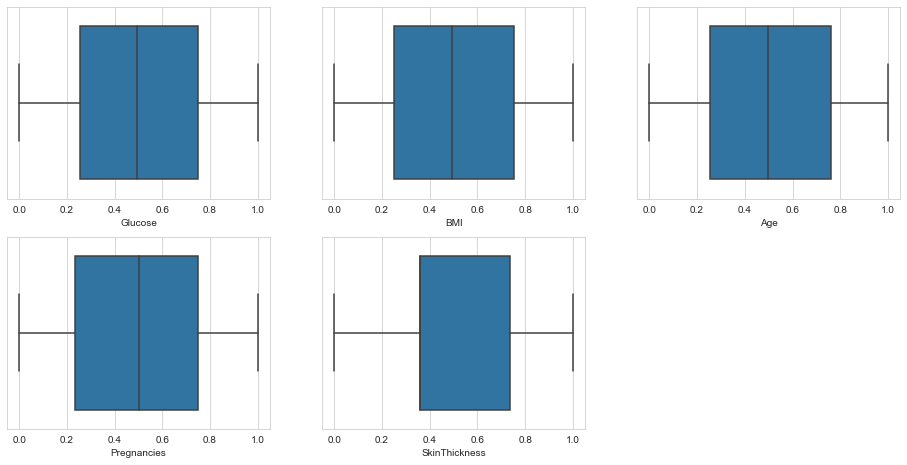

In [33]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['SkinThickness'],data=df_new)

## spliting data set into training and testing set

In [34]:
target_name = 'Outcome'
y = df_new[target_name]
x = df_new.drop(target_name,axis=1)

In [37]:
x.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.357888,0.077575,0.585398
3,0.232725,0.124511,0.357888,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


In [36]:
y

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Outcome, Length: 768, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [41]:
x_train.shape,y_train.shape

((614, 5), (614,))

In [42]:
x_test.shape,y_test.shape

((154, 5), (154,))

## ML Model using KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix

In [44]:
knn =KNeighborsClassifier()
n_neighbors = list(range(15,25))
p = [1,2]
weights = ['uniform','distance']
metric = ['euclidean','manhattan','minkowski']
hyperparameters = dict(n_neighbors=n_neighbors,p=p,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search = GridSearchCV(estimator=knn,param_grid=hyperparameters,n_jobs=-1,cv=cv,scoring='f1',error_score=0)

In [45]:
best_model = grid_search.fit(x_train,y_train)

In [48]:
print('Best leaf_size:',best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:',best_model.best_estimator_.get_params()['p'])
print('Best n_neighbours:',best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbours: 17


In [49]:
knn_pred = best_model.predict(x_test)

In [52]:
knn_pred == y_test

661     True
122     True
113     True
14     False
529     True
       ...  
476    False
482     True
230    False
527     True
380     True
Name: Outcome, Length: 154, dtype: bool

In [54]:
confusion_matrix(y_test,knn_pred)

array([[94, 13],
       [18, 29]], dtype=int64)

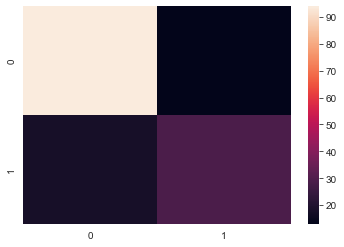

In [66]:
sns.heatmap(confusion_matrix(y_test,knn_pred))

In [69]:
print('Classification report is\n:',classification_report(y_test,knn_pred))
print('\n F1:',f1_score(y_test,knn_pred))
print('\n Pricission Score is: \n',precision_score(y_test,knn_pred))
print('\n recall Score: \n',recall_score(y_test,knn_pred))

Classification report is
:               precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       107
         1.0       0.69      0.62      0.65        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.79      0.80      0.80       154


 F1: 0.651685393258427

 Pricission Score is: 
 0.6904761904761905

 recall Score: 
 0.6170212765957447
